In [16]:
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy

In [17]:
# define routines
def bisection(f,a,b,tol):
    
#    Inputs:
#     f,a,b       - function and endpoints of initial interval
#      tol  - bisection stops when interval length < tol

#    Returns:
#      astar - approximation of root
#      ier   - error message
#            - ier = 1 => Failed
#            - ier = 0 == success

#     first verify there is a root we can find in the interval 

    fa = f(a)
    fb = f(b);
    if (fa*fb>0):
       ier = 1
       astar = a
       return [astar, ier]

#   verify end points are not a root 
    if (fa == 0):
      astar = a
      ier =0
      return [astar, ier]

    if (fb ==0):
      astar = b
      ier = 0
      return [astar, ier]

    count = 0
    d = 0.5*(a+b)
    while (abs(d-a)> tol):
      fd = f(d)
      if (fd ==0):
        astar = d
        ier = 0
        return [astar, ier]
      if (fa*fd<0):
         b = d
      else: 
        a = d
        fa = fd
      d = 0.5*(a+b)
      count = count +1
#      print('abs(d-a) = ', abs(d-a))
      
    astar = d
    ier = 0
    return [astar, ier]

In [18]:
def newton(f,fp,p0,tol,Nmax):
  """
  Newton iteration.
  
  Inputs:
    f,fp - function and derivative
    p0   - initial guess for root
    tol  - iteration stops when p_n,p_{n+1} are within tol
    Nmax - max number of iterations
  Returns:
    p     - an array of the iterates
    pstar - the last iterate
    info  - success message
          - 0 if we met tol
          - 1 if we hit Nmax iterations (fail)
     
  """
  p = np.zeros(Nmax+1);
  p[0] = p0
  for it in range(Nmax):
      p1 = p0-f(p0)/fp(p0)
      p[it+1] = p1
      if (abs(p1-p0) < tol):
          pstar = p1
          info = 0
          return [p,pstar,info,it]
      p0 = p1
  pstar = p1
  info = 1
  return [p,pstar,info,it]

In [19]:
def newtonFromClass(f,fp,p0,tol,Nmax):
  """
  Newton iteration.
  
  Inputs:
    f,fp - function and derivative
    p0   - initial guess for root
    tol  - iteration stops when p_n,p_{n+1} are within tol
    Nmax - max number of iterations
  Returns:
    p     - an array of the iterates
    pstar - the last iterate
    info  - success message
          - 0 if we met tol
          - 1 if we hit Nmax iterations (fail)
     
  """
  p = np.zeros(Nmax+1);
  p[0] = p0;

  derivativeOnce = fp(p0)

  for it in range(Nmax):
      p1 = p0-f(p0)/derivativeOnce
      p[it+1] = p1
      if (abs(p1-p0) < tol):
          pstar = p1
          info = 0
          return [p,pstar,info,it]
      p0 = p1
  pstar = p1
  info = 1
  return [p,pstar,info,it]

In [20]:
def newtonFrom2(f,fp,m,p0,tol,Nmax):
  """
  Newton iteration.
  
  Inputs:
    f,fp - function and derivative
    m    - functions multiplicity
    p0   - initial guess for root
    tol  - iteration stops when p_n,p_{n+1} are within tol
    Nmax - max number of iterations
  Returns:
    p     - an array of the iterates
    pstar - the last iterate
    info  - success message
          - 0 if we met tol
          - 1 if we hit Nmax iterations (fail)
     
  """
  p = np.zeros(Nmax+1);
  p[0] = p0
  for it in range(Nmax):
      p1 = p0-m*f(p0)/fp(p0)
      p[it+1] = p1
      if (abs(p1-p0) < tol):
          pstar = p1
          info = 0
          return [p,pstar,info,it]
      p0 = p1
  pstar = p1
  info = 1
  return [p,pstar,info,it]

### Question 1

#### a)

In [29]:
def f(x):
    return 35*scipy.special.erf(x/(2*np.sqrt(5184000*0.138e-6))) - 15

def df(x):
    return 23.3465*np.e**(-0.349459*x**2)

Text(0, 0.5, '$f(x)$')

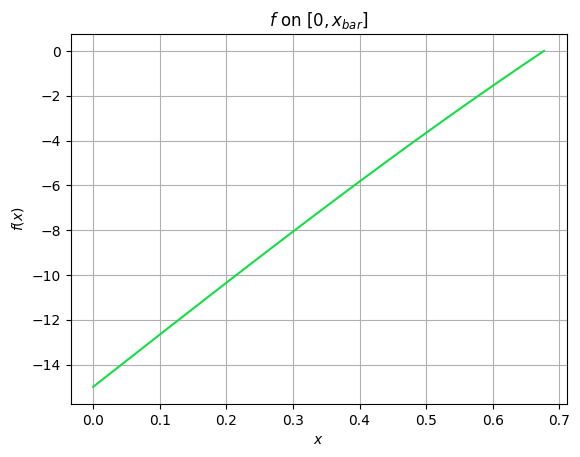

In [32]:
a = 0;
b = 9;
tol = 1e-120

[x_bar, er] = bisection(f, a, b, tol)
x = np.linspace(0, x_bar, 100)

plt.plot(x, f(x), c='#16dc46')
plt.grid(True)
plt.title(r'$f$ on $[0,x_{bar}$]')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')

#### b)

In [23]:
a = 0;
b = 9;
tol = 1e-12

[xbar, er] = bisection(f, a, b, tol)
print('An approximate dpeth using Bisection Method is:', xbar,'meters')

An approximate dpeth using Bisection Method is: 0.6769618544821583 meters


#### c)

In [24]:
x0 = 0.01;
nMax = 1000;

[p,pstar,info,it] = newton(f, df, x0, tol, nMax)
print("Newton's with x0 = 0.01:", pstar, "with", it, 'iterations')

x0 = x_bar;

[p,pstar,info,it] = newton(f, df, x0, tol, nMax)
print(r"Newton's with $x0 = x_{bar}:$", pstar, "with", it, 'iterations')

Newton's with x0 = 0.01: 0.6769618544819365 with 4 iterations
Newton's with $x0 = x_{bar}:$ 0.6769618544819365 with 0 iterations


### Question 4

In [25]:
def f(x):
    return np.e**(3*x) - 27*x**6 + 27*(x**4)*(np.e**x) - 9*(x**2)*np.e**(2*x)
def df(x):
    return 3*np.e**(3*x) - 162*x**5 + 27*(x**4)*(np.e**x) + 108*(x**3)*np.e**x - 18*(x)*np.e**(2*x) - 18*(x**2)*np.e**(2*x)

a = 3;
b = 5;
tol = 1e-6
nMax = 10000

print('For a=1, b=5, tolerance = 10^-6, max # of iterations = 10,000')
[p,pstar,info,it] = newton(f, df, x0, tol, nMax)
print("(i) Newton's method:", pstar, "with", it, 'iterations')

[p,pstar,info,it] = newtonFromClass(f, df, x0, tol, nMax)
print("(ii) the modified Newton's method from class:", pstar, "with", it, 'iterations')

[p,pstar,info,it] = newtonFrom2(f, df, 3, x0, tol, nMax)
print("(iii) the modified Newton's method in Problem 2:", pstar, "with", it, 'iterations')

For a=1, b=5, tolerance = 10^-6, max # of iterations = 10,000
(i) Newton's method: 0.9100047522982512 with 26 iterations
(ii) the modified Newton's method from class: 0.9056209931486026 with 2205 iterations
(iii) the modified Newton's method in Problem 2: 0.9100086821743582 with 3 iterations


### Question 5

#### a)

In [26]:
def f(x):
    return x**6 - x - 1
def df(x):
    return 6*x**5 - 1

x0 = 2;
x1 = 1;
tol = 1e-13

[p,pstar,info,it] = newton(f, df, x0, tol, nMax)

iterations = np.arange(1,9).reshape(1,8)
error = np.abs(p[:it].reshape(1,8) - pstar)

errorTable = np.concatenate((iterations, error), axis=0).transpose()
print(' [   ITERATION       ERROR     ]')
print(' -------------------------------')
print(errorTable)

 [   ITERATION       ERROR     ]
 -------------------------------
[[1.00000000e+00 8.65275862e-01]
 [2.00000000e+00 5.45904134e-01]
 [3.00000000e+00 2.96014850e-01]
 [4.00000000e+00 1.20246818e-01]
 [5.00000000e+00 2.68142944e-02]
 [6.00000000e+00 1.62913577e-03]
 [7.00000000e+00 6.38994211e-06]
 [8.00000000e+00 9.87017135e-11]]


#### b)

Text(0.5, 1.0, '$|x_{k+1} -\\alpha|$ vs. $|x_k -\\alpha|$')

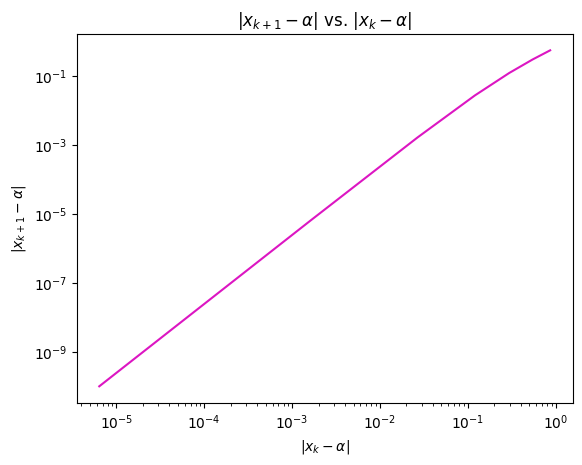

In [27]:
x = error[0,0:it - 1]
y = error[0, 1:it]

plt.loglog(x, y, c='#dc16c2')
plt.xlabel(r'$|x_k -\alpha|$')
plt.ylabel(r'$|x_{k+1} -\alpha|$')
plt.title(r'$|x_{k+1} -\alpha|$ vs. $|x_k -\alpha|$')

C:\Users\maddr\AppData\Local\Temp\ipykernel_7324\1662062496.py:10: RuntimeWarning: invalid value encountered in sqrt
  n = np.sqrt(1 - (omega_p**2 / (omega_0**2 * (x**2))))


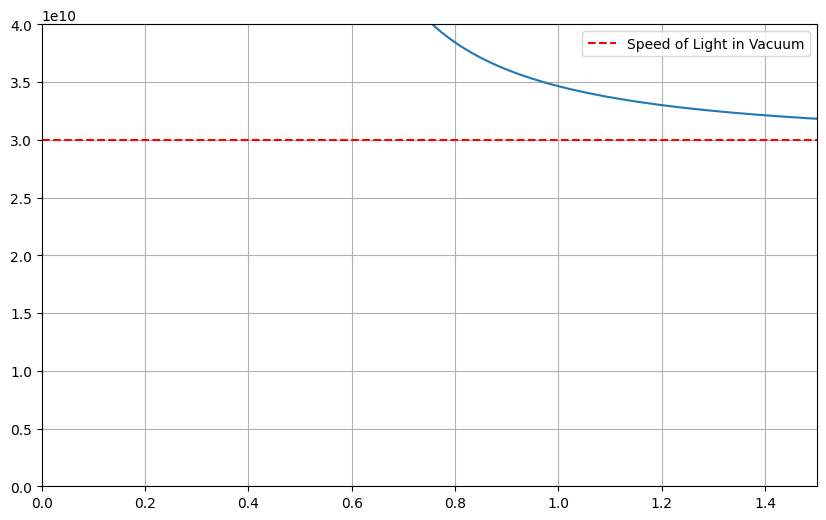

In [28]:
# Parameters
c = 3e10  # Speed of light in cm/s
omega_p = 1.0  # Example plasma frequency (in rad/s)
omega_0 = 2.0  # Example resonant frequency (in rad/s)

# Frequency range for ω/ω_0
x = np.linspace(0.1, 1.5, 1000)  # From 0.1 to 1.5

# Calculate the index of refraction
n = np.sqrt(1 - (omega_p**2 / (omega_0**2 * (x**2))))

# Calculate the phase speed
v_p = c / n

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, v_p)
plt.axhline(c, color='red', linestyle='--', label='Speed of Light in Vacuum')
plt.legend()
plt.grid()
plt.ylim(0, 4e10)  # Adjust as necessary to visualize
plt.xlim(0, 1.5)  # Adjust as necessary
plt.show()
